In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
def load_data(file_path):
    return pd.read_csv('dataset/diabetes.csv')

def preprocess_data(data):
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def standardize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_knn(X_train, y_train, n_neighbors=5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def plot_accuracy(n_values, accuracies):
    plt.plot(n_values, accuracies, marker='o')
    plt.title('KNN Accuracy for Different n_neighbors')
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

def predict_data(data_point, knn_model, scaler):

    df = pd.DataFrame([data_point], columns=['Pregnancies', 'Glucose', 'BloodPressure',
                                             'SkinThickness', 'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction', 'Age'])

    scaled_data_point = scaler.transform(df)

    prediction = knn_model.predict(scaled_data_point)

    return prediction[0]

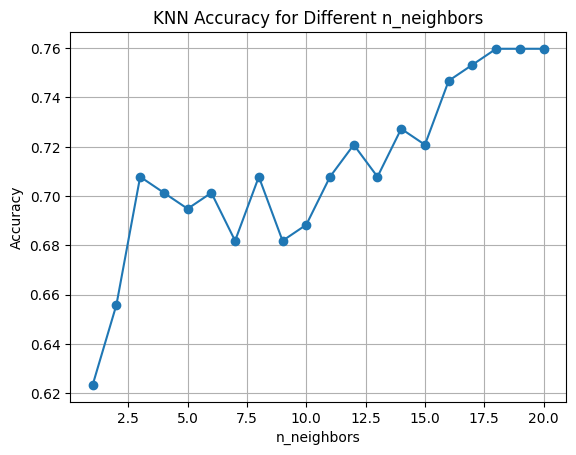

In [9]:
if __name__ == "__main__":
    file_path = "diabetes.csv"
    data = load_data(file_path)

    X, y = preprocess_data(data)

    X_train, X_test, y_train, y_test = split_data(X, y)

    X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

    n_values = range(1, 21)
    accuracies = []

    for n in n_values:
        knn = train_knn(X_train_scaled, y_train, n_neighbors=n)
        accuracy = evaluate_model(knn, X_test_scaled, y_test)
        accuracies.append(accuracy)

    plot_accuracy(n_values, accuracies)

    best_n_neighbors = 5
    knn_best = train_knn(X_train_scaled, y_train, n_neighbors=best_n_neighbors)
